In [7]:
using Pkg

using JSON
using SolidStateDetectors
using Unitful
using Plots
using LegendHDF5IO

In [2]:
using Colors


colors = [
    RGB(0.0, 0.4, 0.85),    # blu deciso
    RGB(0.25, 0.65, 1.0),   # azzurro acceso
    RGB(0.45, 0.45, 0.45),  # grigio medio
    RGB(0.65, 0.65, 0.65),  # grigio chiaro
    RGB(1.0, 0.8, 0.0),     # oro luminoso
    RGB(0.55, 0.85, 1.0),   # azzurro pastello
    RGB(0.0, 0.2, 0.5),
    RGB(1.0, 0.6, 0.0)

]


In [3]:
pwd()

"/home/ritaferi/Phd/SSDdev/notebooks/SOR_const_analyses"

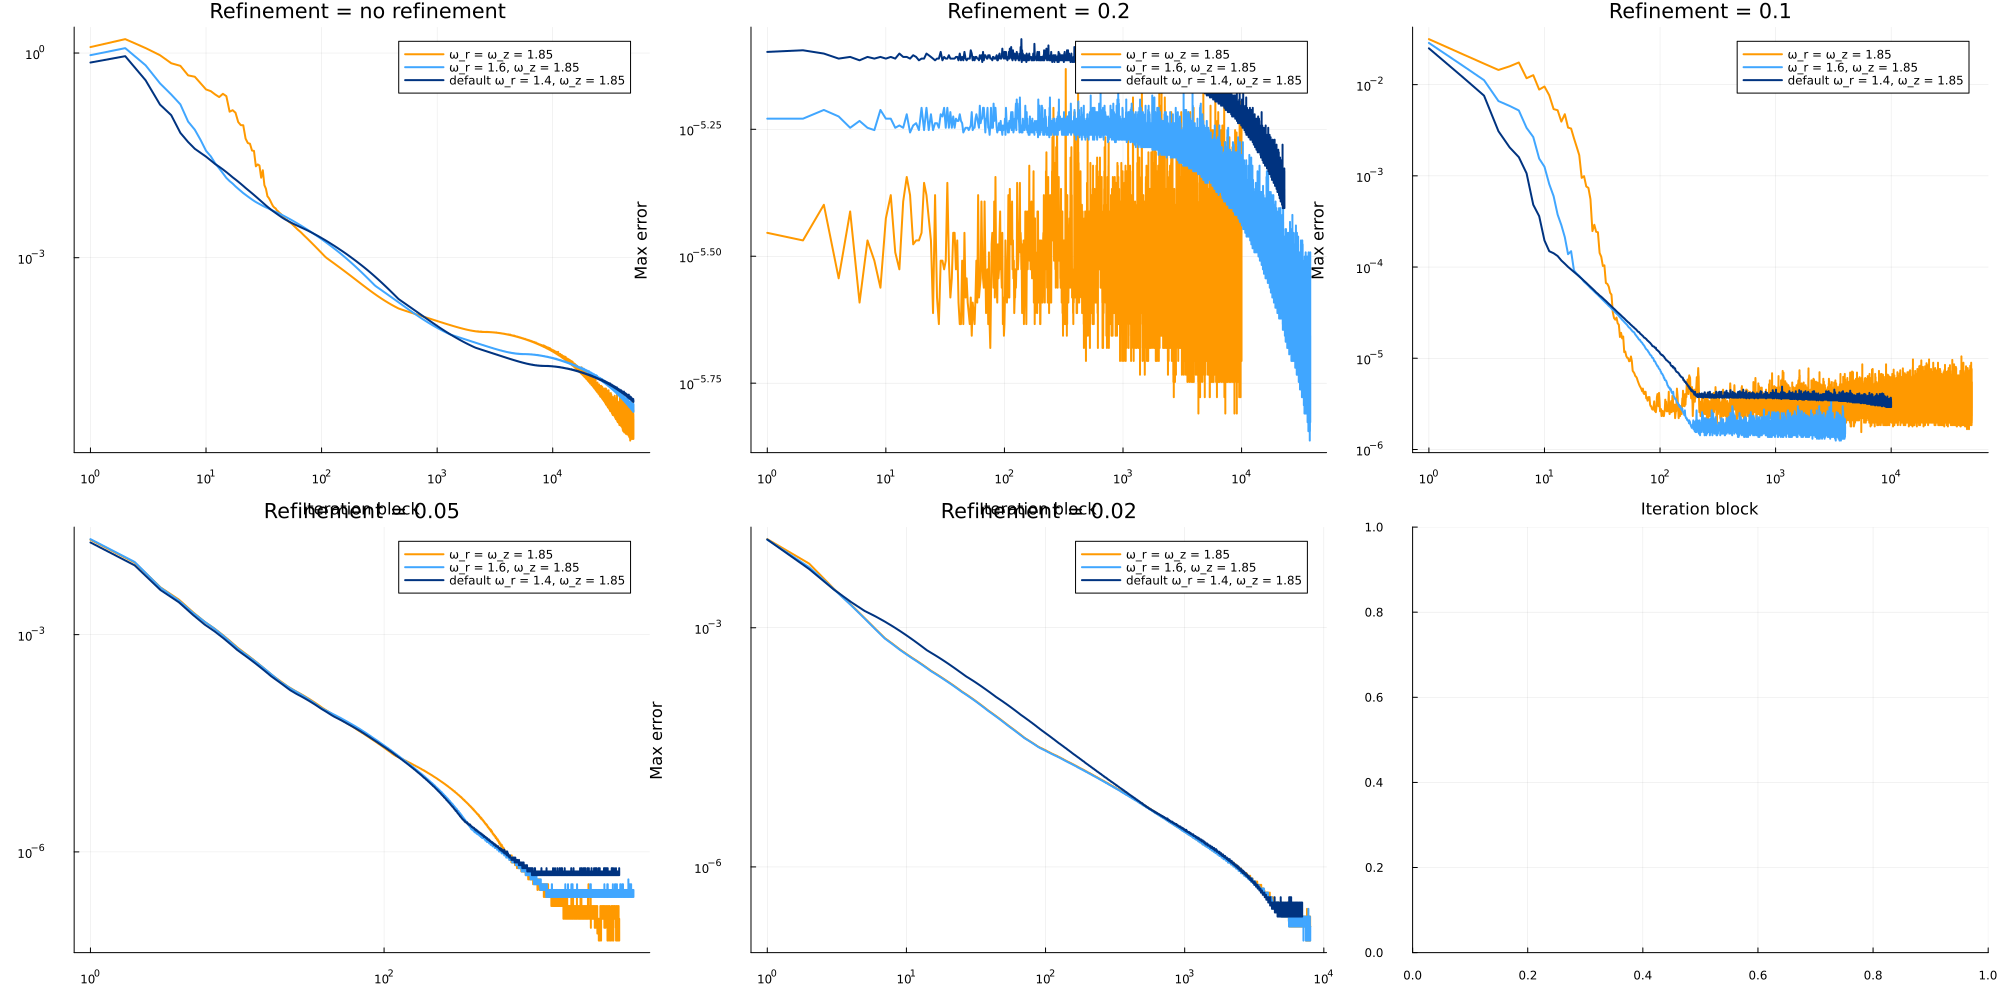

"/home/ritaferi/Phd/SSDdev/notebooks/SOR_const_analyses/plots/SOR_const_0.3mm.png"

In [17]:


# ==============================
# Parametri
# ==============================
dirs = ["json_file/0.3_mm/sor_rz_1.85",
"json_file/0.3_mm/sor_r_1.6_z_1.85",
"json_file/0.3_mm/classic/0.3_mm"]

#dirs = ["json_file/0.1_mm/sor_rz_1.85"
#"json_file/0.1_mm/classic"]

labels_dirs = ["ω_r = ω_z = 1.85", "ω_r = 1.6, ω_z = 1.85", "default ω_r = 1.4, ω_z = 1.85"]  # legenda
refinement_limits = ["no refinement ", 0.2, 0.1, 0.05, 0.02]

# ==============================
# Funzione per ordinare i file
# ==============================
function c_single_index(fname::String)
    if fname == "c_single.json"
        return 1
    end
    m = match(r"^c_single_(\d+)\.json$", fname)
    m === nothing && return nothing
    return parse(Int, m.captures[1]) + 1
end

# ==============================
# Preparazione layout subplot
# ==============================
n_plots = length(refinement_limits)
p = plot(layout = (2, 3), size=(2000, 1000))

#println("1")

color_map = Dict(
    labels_dirs[1] => colors[8],
    labels_dirs[2] => colors[2],
    labels_dirs[3] => colors[7],

)
# ==============================
# Loop per ogni refinement
# ==============================
for i in 1:n_plots
    ref = refinement_limits[i]
    title_ref = ref == "missing" ? "No refinement" : "Refinement = $ref"

    for (d, label_dir) in zip(dirs, labels_dirs)
        # Trova tutti i file nella directory
        files = filter(f -> c_single_index(f) !== nothing, readdir(d))
        files = sort(files, by=c_single_index)

        # Sicurezza: controlla che ci sia il file corrispondente all'indice i
        if i > length(files)
            @warn "File mancante per refinement $ref nella directory $d"
            continue
        end
        #println("2")
        fname = files[i]
        fullpath = joinpath(d, fname)

        data = JSON.parsefile(fullpath)
        c_single_loaded = Float64.(data["c_single"])

        plot!(
            p[i],
            c_single_loaded,
            yscale = :log10,
            #marker = :circle,
            color = color_map[label_dir],
            xlabel = "Iteration block",
            ylabel = "Max error",
           xscale = :log10,
            label = label_dir,
            lw = 2
        )

        #vline!(40000, line = (:dash), label = "Max iterations")
    end
    #println("3")
    plot!(p[i], title = title_ref)
end

display(p)
savefig(p, "plots/SOR_const_0.3mm.png")
